# Low achieving 15-year-olds in PISA test

![description](giphy-copy.gif)

Hi Karishma, can you read this?

Yes, help me!

Great, Christina can you also read this?

Yes I can!

In [17]:
import pandas as pd 
# importing the pandas library for data cleaning and using pd as an alias

In [18]:
df = pd.read_csv("data/raw/sdg_04_40_linear.csv")
# using the read_csv function from pandas library to read the file into a dataframe (pandas specific data type) 

In [19]:
#df.columns
columns_to_drop = ['DATAFLOW', 'LAST UPDATE', 'freq','sex', 'unit', 'CONF_STATUS'] 
#creating a list of columns that need to be dropped

In [20]:
df = df.drop(columns=columns_to_drop,axis = 1)
# using the drop function to remove them from the dataframe 

In [21]:
print(df)

           field            geo  TIME_PERIOD  OBS_VALUE OBS_FLAG
0        Reading        Albania         2000       70.4      NaN
1    Mathematics        Albania         2009       67.7      NaN
2        Reading        Albania         2009       56.7        b
3        Science        Albania         2009       57.3      NaN
4    Mathematics        Albania         2012       60.7      NaN
..           ...            ...          ...        ...      ...
774      Reading  United States         2018       19.3        b
775      Science  United States         2018       18.6      NaN
776  Mathematics  United States         2022       33.9      NaN
777      Reading  United States         2022       20.1      NaN
778      Science  United States         2022       21.9      NaN

[779 rows x 5 columns]


In [22]:
df = df[df['TIME_PERIOD']>=2006]
# only saving the records from 2006 

In [23]:
print(df)

           field            geo  TIME_PERIOD  OBS_VALUE OBS_FLAG
1    Mathematics        Albania         2009       67.7      NaN
2        Reading        Albania         2009       56.7        b
3        Science        Albania         2009       57.3      NaN
4    Mathematics        Albania         2012       60.7      NaN
5        Reading        Albania         2012       52.3      NaN
..           ...            ...          ...        ...      ...
774      Reading  United States         2018       19.3        b
775      Science  United States         2018       18.6      NaN
776  Mathematics  United States         2022       33.9      NaN
777      Reading  United States         2022       20.1      NaN
778      Science  United States         2022       21.9      NaN

[697 rows x 5 columns]


In [24]:
df[df['OBS_VALUE'].isnull()][['field','geo','TIME_PERIOD','OBS_VALUE']]
# gathering a list of records whose score is null

,field,geo,TIME_PERIOD,OBS_VALUE
22,Reading,Austria,2009,NaN
93,Reading,Cyprus,2009,NaN
394,Reading,Liechtenstein,2009,NaN
395,Reading,Liechtenstein,2018,NaN
483,Reading,North Macedonia,2009,NaN
680,Reading,Spain,2018,NaN


In [25]:
countries_null = df[df['OBS_VALUE'].isnull()][['field','geo','TIME_PERIOD','OBS_VALUE']]
# saving countries with null scores to a variable

The data has been cleaned and stored in the variable df

We will now continue with analysing RQ1: How have low achievement rates evolved over time across countries? 
The dataset was loaded using a project-relative file path to ensure full reproducibility across all group members and systems. This avoids user-specific absolute paths and allows the notebook to be executed consistently from the shared Git repository.

In [26]:
df.head()
df.info()
df.describe()
# using head, info and describe functions to get a better understanding of the data (more specifically no missing values in OBS_VALUE (we already filtered them), the data types are correct and we understand the numerical range)

<class 'pandas.core.frame.DataFrame'>
Index: 697 entries, 1 to 778
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   field        697 non-null    object 
 1   geo          697 non-null    object 
 2   TIME_PERIOD  697 non-null    int64  
 3   OBS_VALUE    691 non-null    float64
 4   OBS_FLAG     84 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 32.7+ KB


,TIME_PERIOD,OBS_VALUE
count,697.000000,691.000000
mean,2013.678623,24.835166
std,5.279816,12.330833
min,2006.000000,4.100000
25%,2009.000000,17.000000
50%,2015.000000,21.500000
75%,2018.000000,28.150000
max,2022.000000,73.900000


In [ ]:
import matplotlib.pyplot as plt

# to get the average across all countries and subjects per year
global_trend = df.groupby("TIME_PERIOD")["OBS_VALUE"].mean().reset_index()

print(global_trend)


   TIME_PERIOD  OBS_VALUE
0         2006  23.313636
1         2009  22.828947
2         2012  22.078632
3         2015  24.860833
4         2018  25.268033
5         2022  30.971296


From these values we can already see that low achievement is increasing over time. There is a small decrease from 2006 to 2012, but then it starts to rise until 2022.

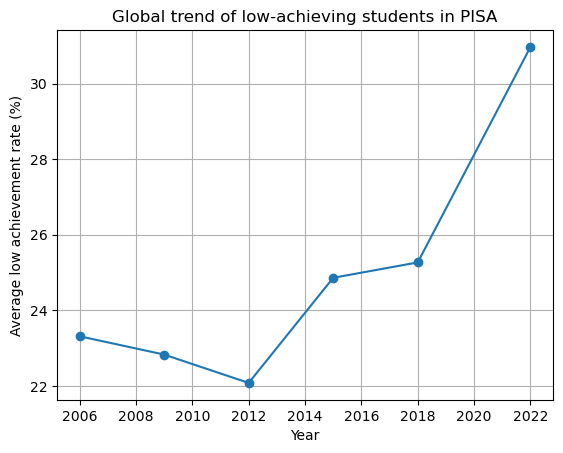

In [ ]:
plt.figure()
plt.plot(global_trend["TIME_PERIOD"], global_trend["OBS_VALUE"], marker="o")
plt.xlabel("Year")
plt.ylabel("Average low achievement rate (%)")
plt.title("Global trend of low-achieving students in PISA")
plt.grid(True)
plt.show()
# plotting the global trend of low-achieving students in PISA over the years


The plot confirms this observation, there is a decrease in the low achievement rate until increasing sharply in 2012 - 2022. Next we will look at potential differences per subject.

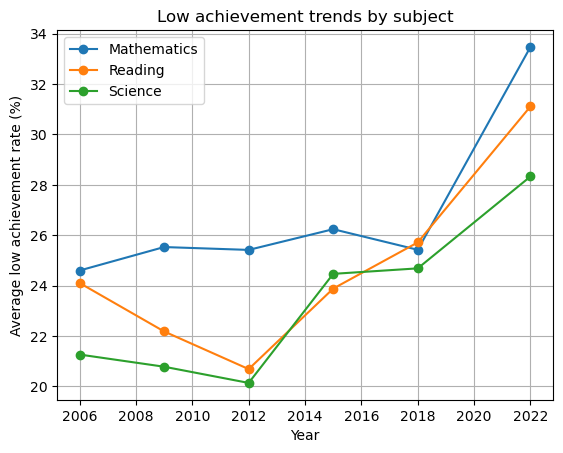

In [30]:
subject_trend = df.groupby(["TIME_PERIOD", "field"])["OBS_VALUE"].mean().reset_index()

for subject in subject_trend["field"].unique():
    temp = subject_trend[subject_trend["field"] == subject]
    plt.plot(temp["TIME_PERIOD"], temp["OBS_VALUE"], marker="o", label=subject)

plt.xlabel("Year")
plt.ylabel("Average low achievement rate (%)")
plt.title("Low achievement trends by subject")
plt.legend()
plt.grid(True)
plt.show()
# plotting the trends of low-achieving students in PISA over the years by subject

With this graph, further differences emerge. We can see how low achievement rates were the lowest in Science and the highest in Mathematics. Moreover, we can see that Mathematics low achievement levels remained comparativley stable until 2018, when the followed the increasing trend with Reading and Science.

Next we will look at the development of low achieving rates (the average of all three subjects) in certain countries according to our personal interest and geographical considerations. For this we first have to calculate the average low achievement rate of the three subjects. Then we will plot a graph to visualize the development.

In [37]:
df_country_year = (
    df.groupby(["geo", "TIME_PERIOD"])["OBS_VALUE"]
      .mean()
      .reset_index()
)
# creating a new dataframe that groups by country and year to get the average low-achieving student rate for each country per year

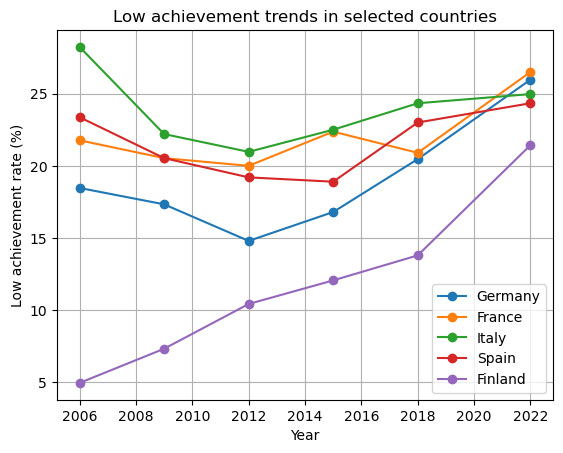

In [40]:
selected_countries = ["Germany", "France", "Italy", "Spain", "Finland"]

df_sel = df_country_year[df_country_year["geo"].isin(selected_countries)]

for country in selected_countries:
    temp = df_sel[df_sel["geo"] == country]
    plt.plot(temp["TIME_PERIOD"], temp["OBS_VALUE"], marker="o", label=country)

plt.xlabel("Year")
plt.ylabel("Low achievement rate (%)")
plt.title("Low achievement trends in selected countries")
plt.legend()
plt.grid(True)
plt.show()
# plotting the trends of low-achieving students in selected countries over the years



From this graph we can see how Finland's education system seemed to held low achievement rates to 5% but still drastically increased until 2022. In contrast to it, Italy was able lower its low achievement rate over the years.

Next we will look at the countries that experienced the greatest increases in low achievement

In [ ]:
trend_change = (
    df.sort_values("TIME_PERIOD")
      .groupby("geo")["OBS_VALUE"]
      .agg(["first", "last"])
      .reset_index()
      
)

trend_change["change"] = trend_change["last"] - trend_change["first"]

trend_change_sorted = trend_change.sort_values("change")
trend_change = trend_change.dropna(subset=["first", "last", "change"])
trend_change_sorted = trend_change.sort_values("change")
# countries with incomplete time series at the beginning or end of the observation period were excluded from the long-term change analysis, as first–last differences could not be computed for these cases.

trend_change_sorted.head(10)   # biggest improvements
trend_change_sorted.tail(10)   # biggest deteriorations
# analyzing the changes in low-achieving student rates from the first to the last recorded year for each country

,geo,first,last,change
14,Hungary,21.2,29.5,8.3
37,Sweden,18.4,27.2,8.8
27,Norway,22.4,31.5,9.1
41,United States,24.4,33.9,9.5
5,Cyprus,42.0,53.2,11.2
10,Finland,6.0,18.0,12.0
33,Slovakia,21.0,35.4,14.4
13,Greece,32.5,47.2,14.7
25,Netherlands,11.6,27.4,15.8
15,Iceland,16.9,39.7,22.8


This table shows that most countries experienced an increase in low achievement over time. Iceland, the Netherlands, Greece, and Slovakia exhibit the strongest deteriorations.

Next we will look at the countries which experiences the greatest decrease, i.e. a positive development in the case of low achievement rates.

In [54]:
improvements = trend_change_sorted[trend_change_sorted["change"] < 0]
improvements
#looking at the countries with the most significant improvements in low-achieving student rates over the years


,geo,first,last,change
39,Türkiye,52.2,29.3,-22.9
17,Italy,33.0,21.4,-11.6
30,Romania,52.9,41.7,-11.2
29,Portugal,30.9,21.8,-9.1
32,Serbia,42.6,36.4,-6.2
3,Bulgaria,53.4,48.0,-5.4
18,Japan,13.1,8.0,-5.1
31,Russia,26.8,22.1,-4.7
26,North Macedonia,70.7,66.2,-4.5
19,Latvia,20.8,16.5,-4.3


From this table we can see the countries with the largest decrease in low achievement rates. Notably, Turkiye, Italy and Romania experienced a significant decrease.